<h1>How to Make Baseline Predictions for Time Series Forecasting with Python</h1><br>
: https://machinelearningmastery.com/persistence-time-series-forecasting-with-python/

In [6]:
import sys
# add util lib path
sys.path.append('/Users/gonsoomoon/Documents/DeepLearning/rnn/time_series_prediction/util')

In [80]:
import pandas as pd
from pandas import datetime
from matplotlib import pyplot
import ts_input  as ui   # user-defined lib
from pandas import DataFrame
shampoo_input = '../input/sales-of-shampoo-over-a-three-ye.csv'
series = ui.load_series_data(shampoo_input)

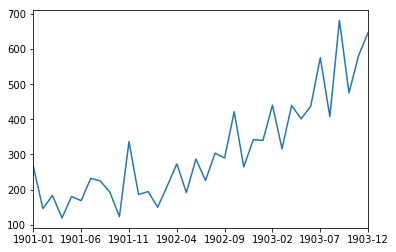

In [81]:

def convert_to_datestring(idx):
    dt = []
    for i in idx:
        s_date = "190" + str(i[3]) + str(i[4:7])
        dt.append(s_date)
        #print(date)
    return dt

dt = convert_to_datestring(series.index)
#print(dt)
#DatetimeIndex.strftime(date_format
series.index = dt
series.plot()
pyplot.show()



<h2>Step 1: Define the supervised learning problem</h2>

In [63]:
from pandas import concat
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(5))


     t-1    t+1
0    NaN  266.0
1  266.0  145.9
2  145.9  183.1
3  183.1  119.3
4  119.3  180.3


<h2>Step 2: Train and Test Sets

In [69]:
X = dataframe.values
X.shape
train_size = int(X.shape[0] * 0.66)



In [71]:
X = dataframe.values
train_size = int(X.shape[0] * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
print(train_X[0:3], train_y[0:3])
test_X, test_y = test[:,0], test[:,1]


[266.  145.9 183.1] [145.9 183.1 119.3]


<h2>Step 3: Persistence Algorithm</h2>

In [72]:
def model_persistence(x):
    return x

<h2>Step 4: Make and Evaluate Forecast</h2>

In [75]:
from sklearn.metrics import mean_squared_error
# walkpredic-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)

Test MSE: 17730.518


<h2>Step 5: Complete Example</h2>

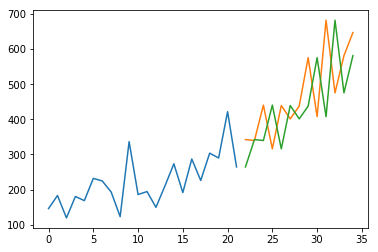

In [76]:
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()